In [4]:
library(tidyverse)
library(plotly)

Warning message:
"package 'tidyverse' was built under R version 3.3.2"Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Warning message:
"package 'tibble' was built under R version 3.3.2"Warning message:
"package 'tidyr' was built under R version 3.3.2"Warning message:
"package 'readr' was built under R version 3.3.2"Warning message:
"package 'purrr' was built under R version 3.3.2"Warning message:
"package 'dplyr' was built under R version 3.3.2"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
"package 'plotly' was built under R version 3.3.2"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following obj

In [7]:
diamonds %>% as.data.frame %>% head

  carat       cut color clarity depth table price    x    y    z
1  0.23     Ideal     E     SI2  61.5    55   326 3.95 3.98 2.43
2  0.21   Premium     E     SI1  59.8    61   326 3.89 3.84 2.31
3  0.23      Good     E     VS1  56.9    65   327 4.05 4.07 2.31
4  0.29   Premium     I     VS2  62.4    58   334 4.20 4.23 2.63
5  0.31      Good     J     SI2  63.3    58   335 4.34 4.35 2.75
6  0.24 Very Good     J    VVS2  62.8    57   336 3.94 3.96 2.48

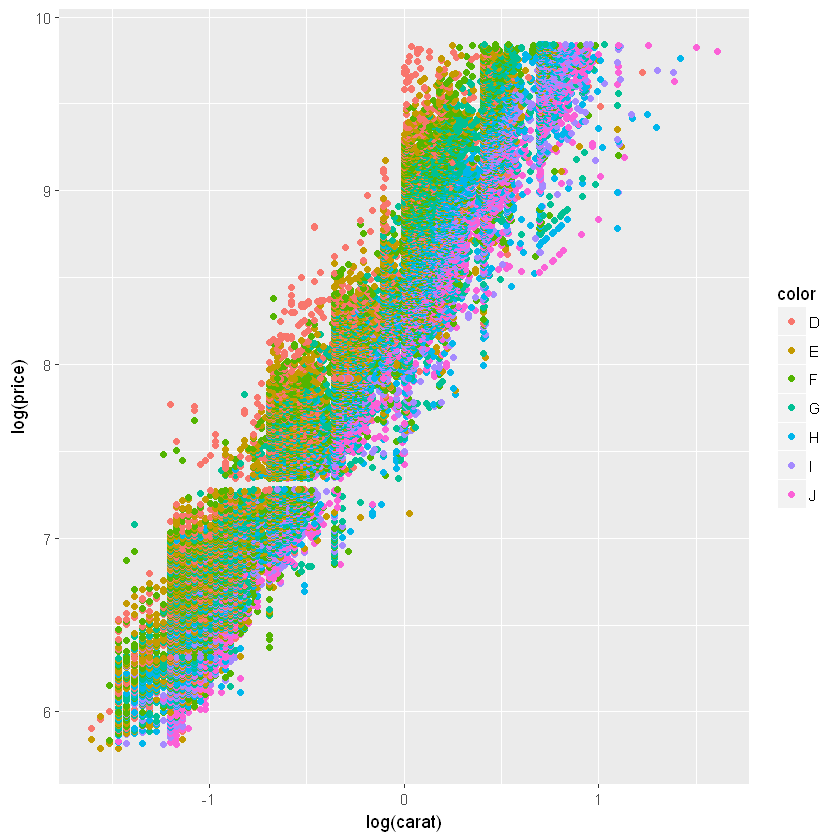

In [11]:
diamonds %>% ggplot(aes(x = log(carat), y=log(price), color = color)) + geom_point()

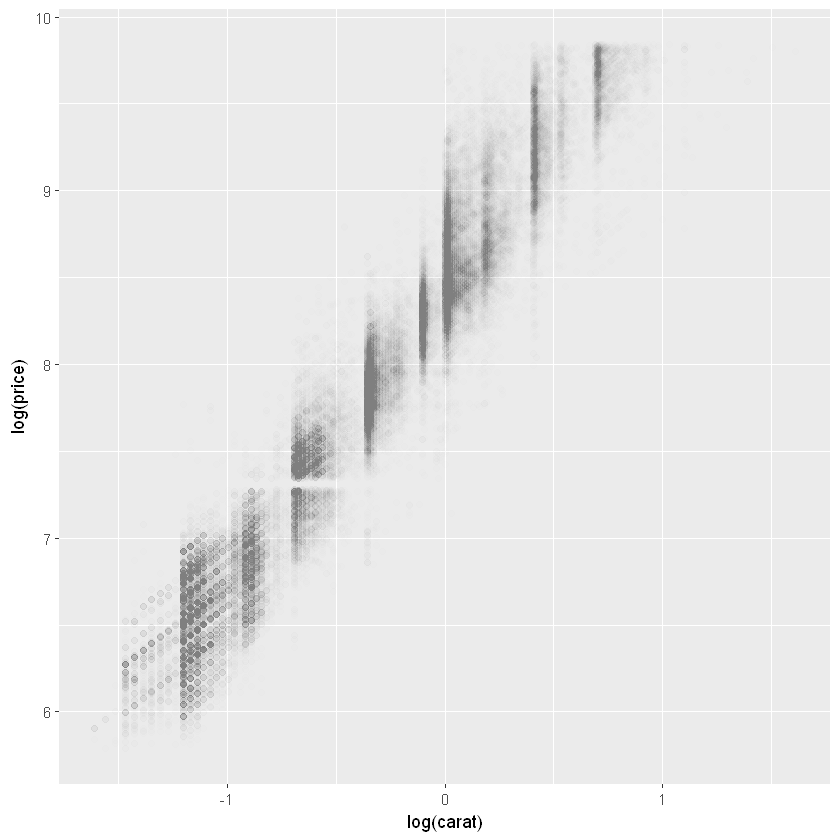

In [12]:
diamonds %>% ggplot(aes(x = log(carat), y=log(price), color =  I(alpha("black", 1/200)))) + geom_point()

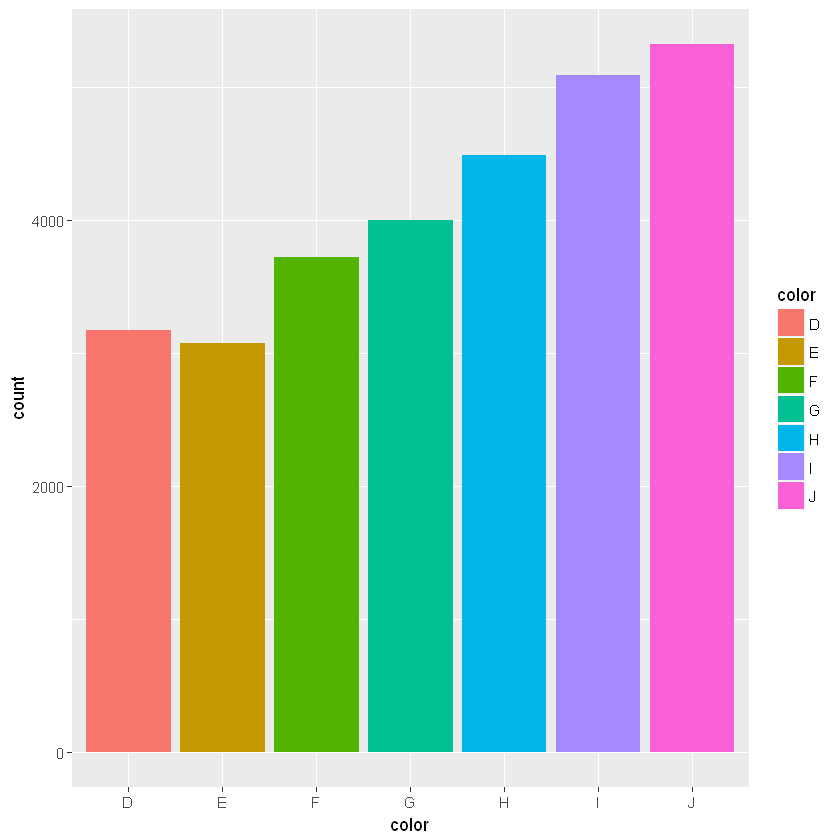

In [44]:
diamonds %>% group_by(color) %>%
summarise(mean_price = mean(price)) %>% 
ggplot(aes(x = color, weight = mean_price, fill=color )) + geom_bar()

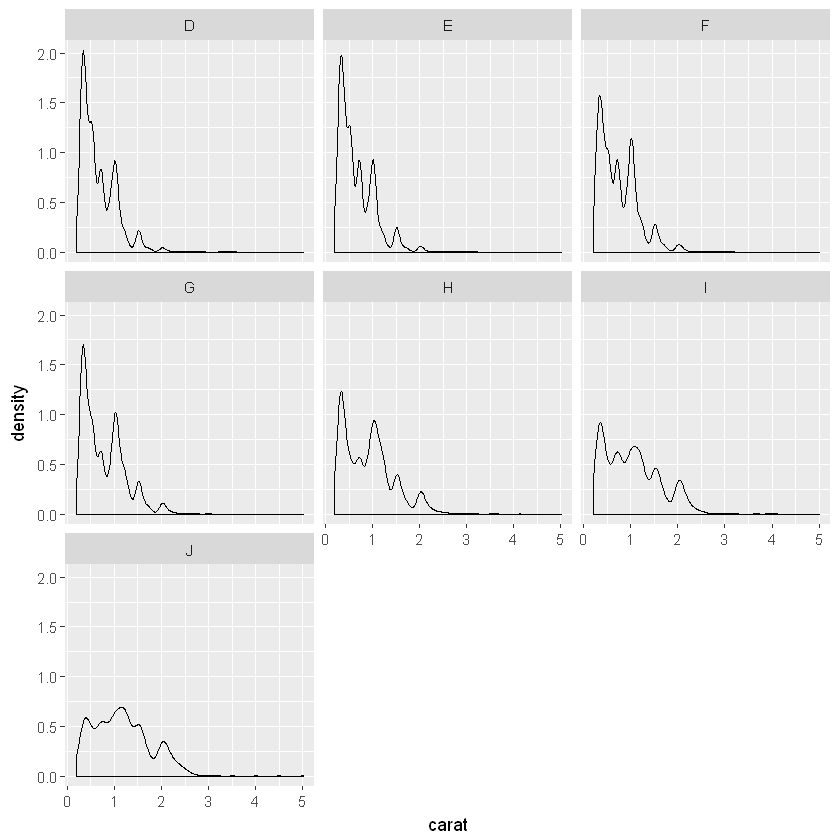

In [43]:
diamonds %>% 
ggplot(aes(carat)) + geom_density() + facet_wrap( ~ color , ncol = 3)

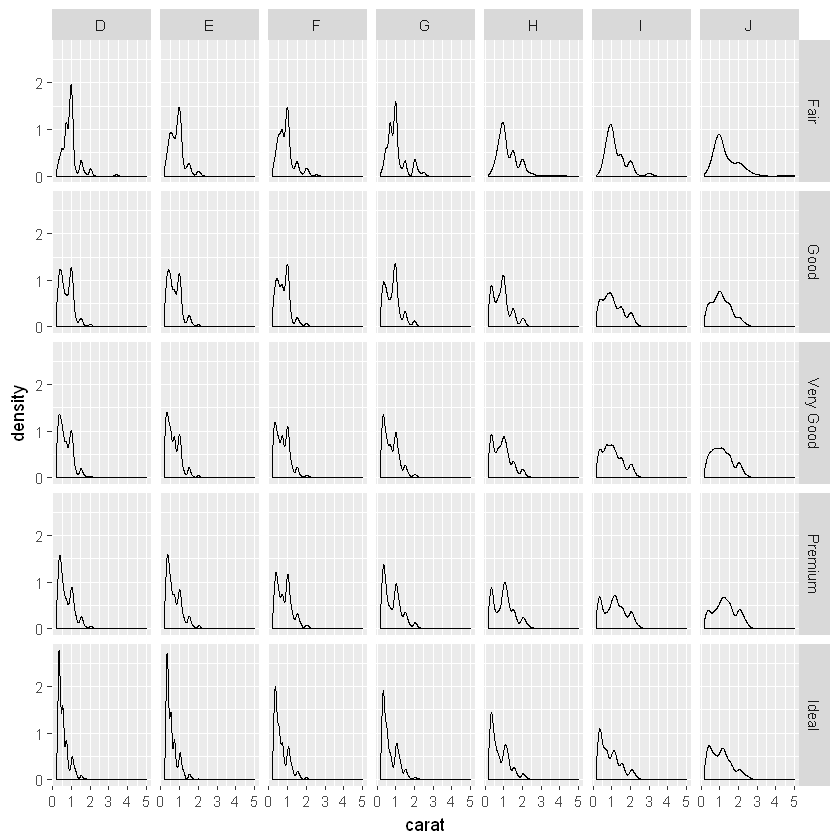

In [49]:
diamonds %>% 
ggplot(aes(carat)) + geom_density() + facet_grid(cut ~ color)

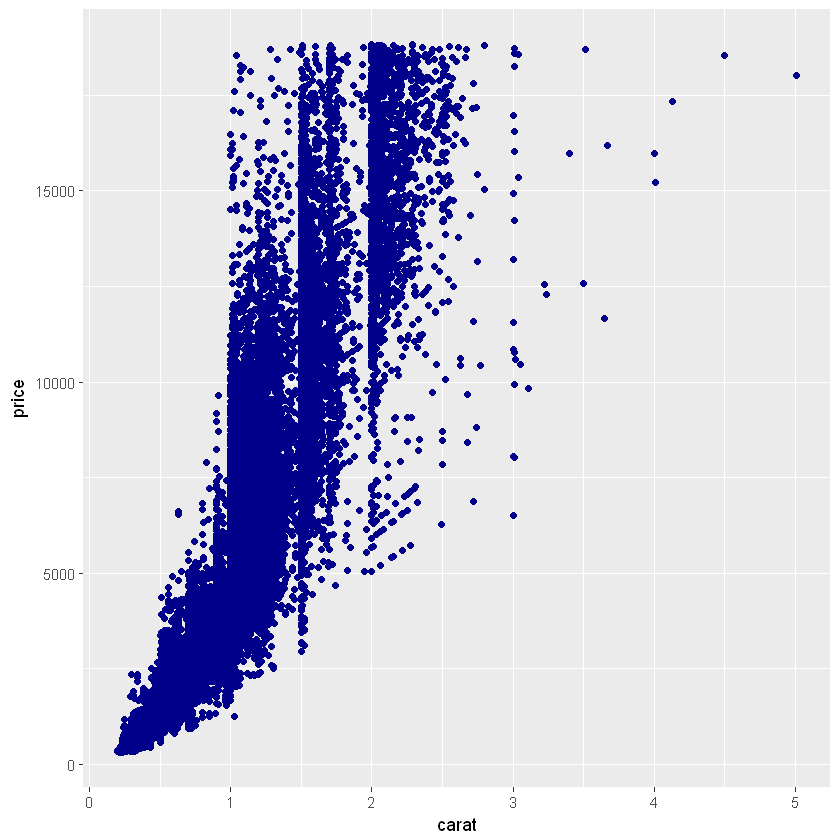

In [48]:
ggplot(diamonds,aes(carat,price))+geom_point(colour="darkblue")

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."

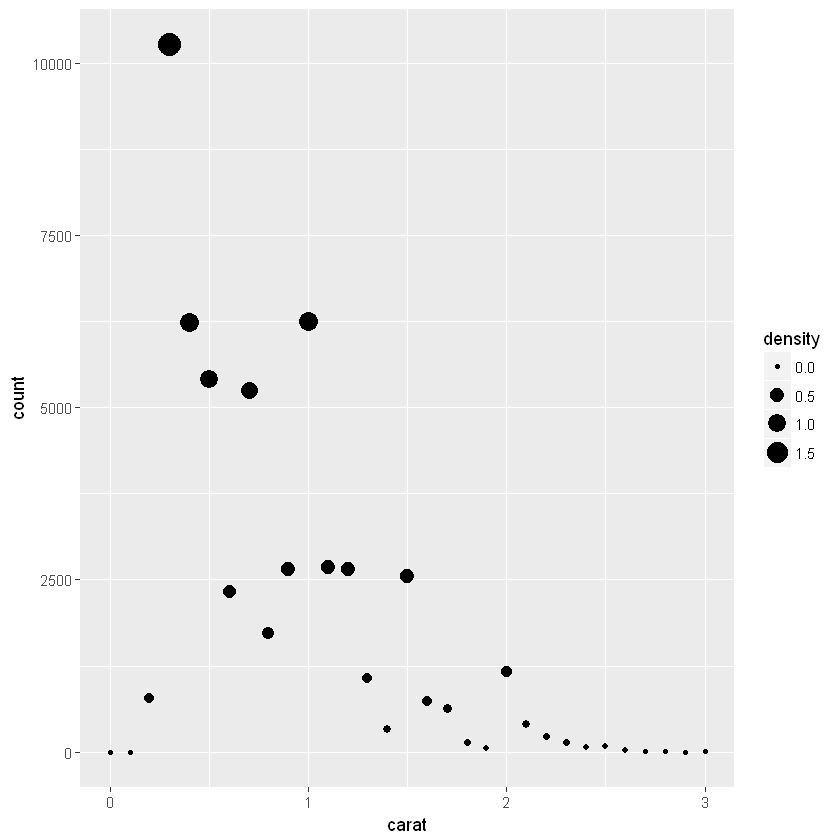

In [112]:
diamonds %>% ggplot(aes(carat)) + 
xlim(0, 3) +
#stat_bin(aes(ymax = ..count..), binwidth = 0.1, geom = "area") + 
 stat_bin(
      aes( size = ..density.. ), binwidth = 0.1, 
      geom = "point", position="identity"
 ) #+ 
#scale_color_continuous(low = "red", limits=c(0,2))

#+ 
# stat_bin(
#      aes(y = 1, fill = ..count..), binwidth = 0.1,
#      geom = "tile", position="identity"
# )

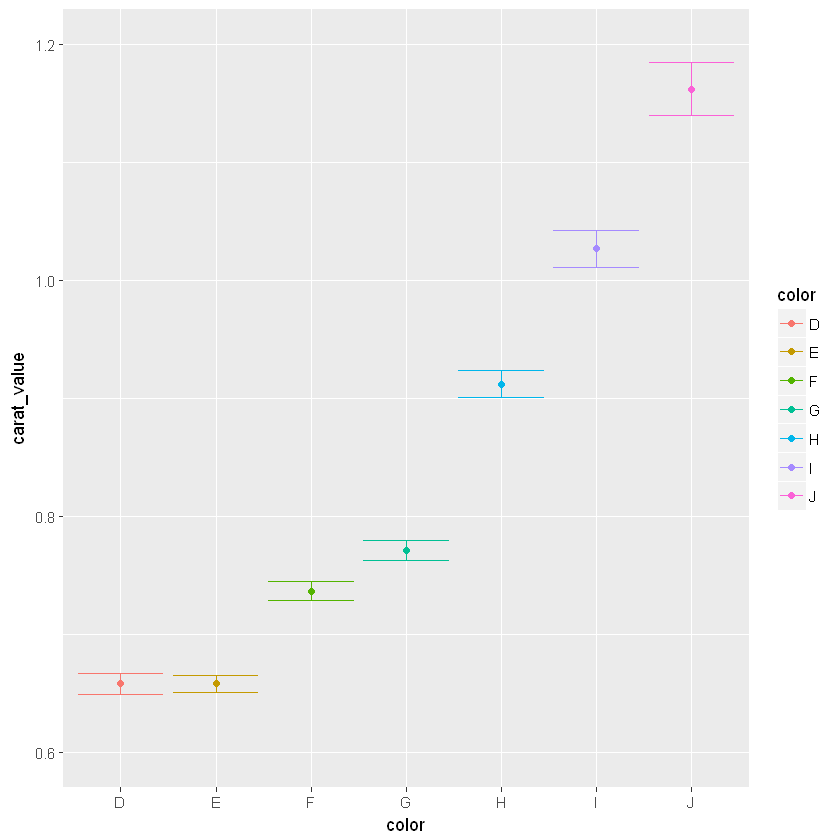

In [155]:
diamonds %>% 
mutate(carat_bins = floor(carat / 0.05)*0.05 ) %>%
group_by(color) %>%
summarise(
    carat_value = mean(carat),
    carat_se = sqrt(var(carat)/n())
) %>% 
ggplot(aes(x = color, y = carat_value, color = color
           , ymin = carat_value - 2*carat_se
           , ymax = carat_value + 2*carat_se)) + geom_point() + scale_y_continuous(limits = c(0.6,1.2)) + geom_errorbar()